**Alan Delon**
**Ciência de Dados : Intermediário**
**C-Jovem Uece -  01/2025**

# Oficina 8: Usando técnicas e estratégias de análise de dados

## Introdução

**Análise de Componentes Principais (PCA - Principal Component Analysis)**

Objetivo da técnica é reduzir a quantidade das dimensões em componentes principais retendo a máxima quantidade de informações.

O PCA foi escolhido por ser ideal em simplificar a análise de dados com múltiplas variáveis numéricas (como idade, frequencia_compras e total_gasto), facilitando a identificação de agrupamentos ou tendências. 

**Algoritmo Apriori**

O Apriori é o método padrão para análise de associação em dados transacionais, como listas de produtos comprados por clientes. Ele identifica combinações frequentes de itens com eficiência.

O algoritmo gera regras de associação do tipo "se X, então Y", baseadas em métricas como suporte (frequência da combinação) e confiança (probabilidade de Y ocorrer dado X). Por exemplo, uma regra poderia revelar que 20% dos clientes que compraram Eletrônicos também compraram Livros (suporte) com 60% de confiança. Isso permite que a empresa otimize estratégias de cross-selling ou campanhas promocionais.


### 1. Gerando dados sintéticos

In [1]:
!pip install mlxtend
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



np.random.seed(42)

n_clientes = 5000  
categorias = ['Eletrônicos', 'Vestuário', 'Mercado', 'Livros', 'Beleza']
gasto_medio_por_categoria = {
    'Eletrônicos': 300,  
    'Vestuário': 150,
    'Mercado': 100,
    'Livros': 80,
    'Beleza': 120
}


dados = []
for _ in range(n_clientes):
    
    idade = int(np.random.normal(loc=35, scale=10))
    idade = max(18, min(idade, 80))  
    
    frequencia = np.random.poisson(lam=4) + 1 
    
    if idade < 25:
        probs = [0.4, 0.3, 0.1, 0.1, 0.1]
    elif idade < 50:
        probs = [0.2, 0.2, 0.3, 0.1, 0.2]
    else:
        probs = [0.1, 0.1, 0.5, 0.2, 0.1]
    
    categorias_cliente = np.random.choice(
        categorias, 
        size=np.random.randint(1, 4),  
        p=np.array(probs) / sum(probs),  
        replace=False
    )
    
    total_gasto = 0
    for categoria in categorias_cliente:
        gasto = gasto_medio_por_categoria[categoria] * (1 + np.random.normal(0, 0.2))
        total_gasto += gasto * frequencia
    
    total_gasto = max(0, int(total_gasto))
    
    dados.append({
        'idade': idade,
        'frequencia_compras': frequencia,
        'categorias': ', '.join(categorias_cliente),
        'total_gasto': total_gasto
    })

df = pd.DataFrame(dados)
print(df.head())


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
   idade  frequencia_compras                       categorias  total_gasto
0     39                   4  Mercado, Vestuário, Eletrônicos         2170
1     37                   1                          Mercado          102
2     35                   3     Mercado, Livros, Eletrônicos         1608
3     36                   2                           Beleza          215
4     28                   4                           Beleza          570


## 2. Pré-processamento

/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


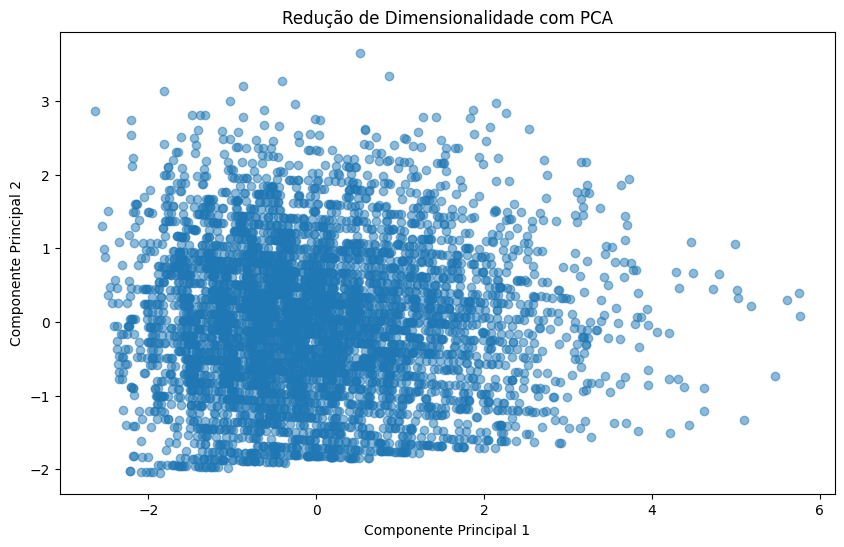

Variância explicada: [0.52231223 0.33601641]


In [3]:
scaler = StandardScaler()
dados_numericos = scaler.fit_transform(df[['idade', 'frequencia_compras', 'total_gasto']])

# Aplicando o PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_numericos)

# Visualizando a dimensionalidade reduzida
plt.figure(figsize=(10,6))
plt.scatter(dados_pca[:,0], dados_pca[:,1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Redução de Dimensionalidade com PCA')
plt.show()

print(f"Variância explicada: {pca.explained_variance_ratio_}")

## 3. Aplicando a regra de associação

In [2]:
transacoes = df['categorias'].str.split(', ').tolist()

te = TransactionEncoder()
te_array = te.fit_transform(transacoes)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)


frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

melhores_regras = regras[regras['lift'] > 1.2].sort_values('lift', ascending=False)
print(melhores_regras[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=711fa5db-35ea-4568-821e-7282e587b3c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>